In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

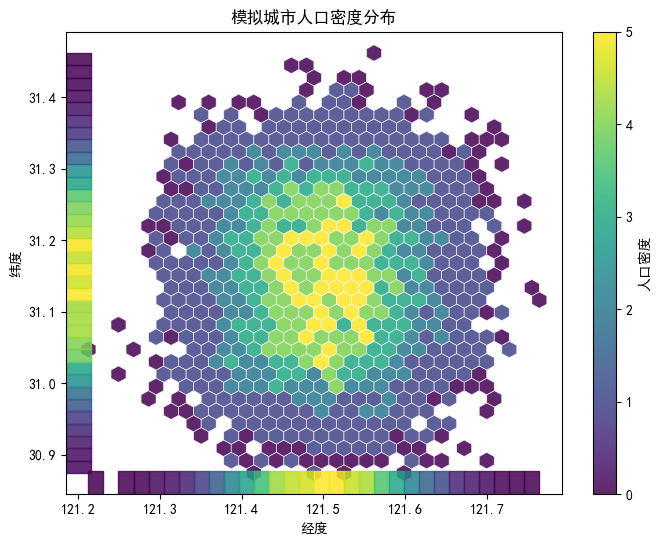

In [3]:
# 模拟城市人口密度数据
np.random.seed(456)
lat = np.random.uniform(31.0, 31.3, 10000)
lon = np.random.uniform(121.4, 121.6, 10000)
# 模拟中心区域人口更密集
lat += 0.05 * np.random.normal(0, 1, 10000)
lon += 0.05 * np.random.normal(0, 1, 10000)

plt.figure(figsize=(8, 6))

hb = plt.hexbin(
    lon,                       # x轴数据：经度
    lat,                       # y轴数据：纬度
    gridsize=30,               # 网格数量：x方向30个六边形，y方向自动计算
    reduce_C_function=np.sum,  # 聚合函数：计算每个六边形内的总和（此处统计点数总和）
    bins=6,                    # 分箱数量：将密度值分为6个等级，相同等级使用相同颜色
    mincnt=1,                  # 过滤阈值：仅显示包含至少1个数据点的六边形
    cmap='viridis',            # 颜色映射：使用viridis配色
    edgecolors='white',        # 六边形边框颜色
    linewidths=0.5,            # 边框线宽
    alpha=0.85,                # 透明度
    marginals=True             # 边缘分布：在x轴底部和y轴左侧添加边缘密度图
)

plt.colorbar(hb, label='人口密度')
plt.title('模拟城市人口密度分布')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.show()

# 2、使用示例：

### 示例 1：与散点图对比

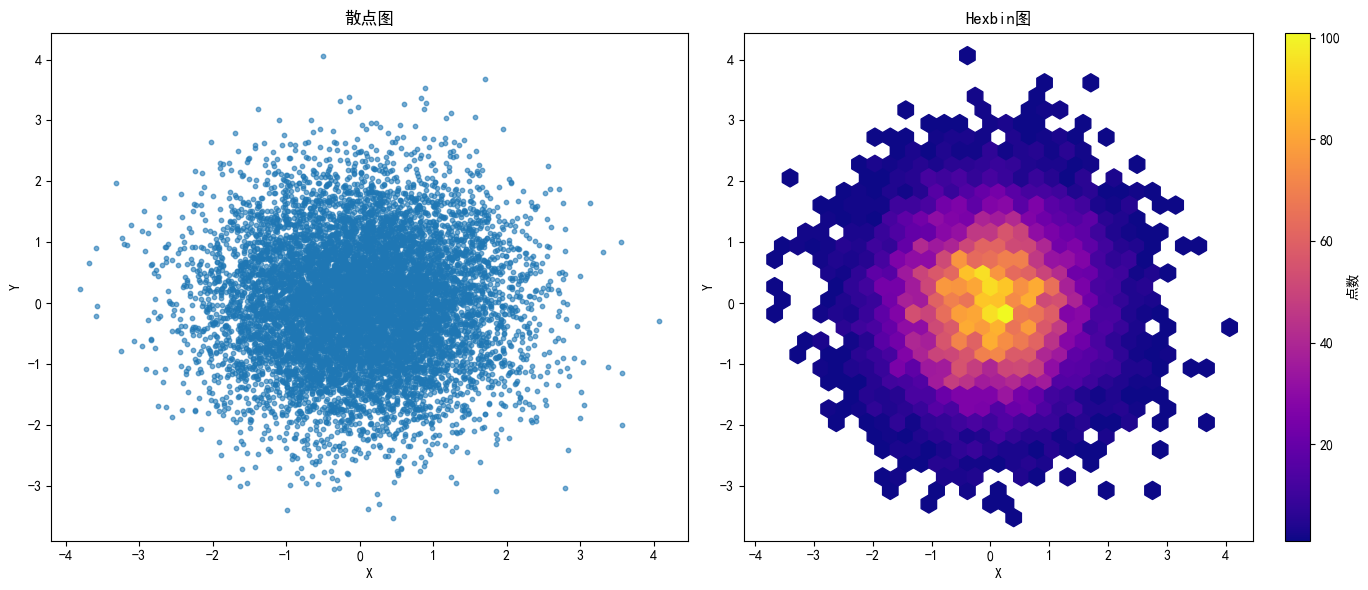

In [4]:
# 生成数据
np.random.seed(123)
x = np.random.randn(10000)
y = np.random.randn(10000)

# 创建图形和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 子图1：普通散点图
ax1.scatter(x, y, alpha=0.6, s=10)
ax1.set_title('散点图')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# 子图2：Hexbin图
hb = ax2.hexbin(x, y, gridsize=30, cmap='plasma', mincnt=1)
cb = fig.colorbar(hb, ax=ax2, label='点数')
ax2.set_title('Hexbin图')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

### 示例 2：根据返回值修改样式

六边形中心坐标数组形状: (826, 2)
六边形值数组形状: (826,)
x方向边际图值数组形状: (38,)
x方向边际图值数组形状: (42,)


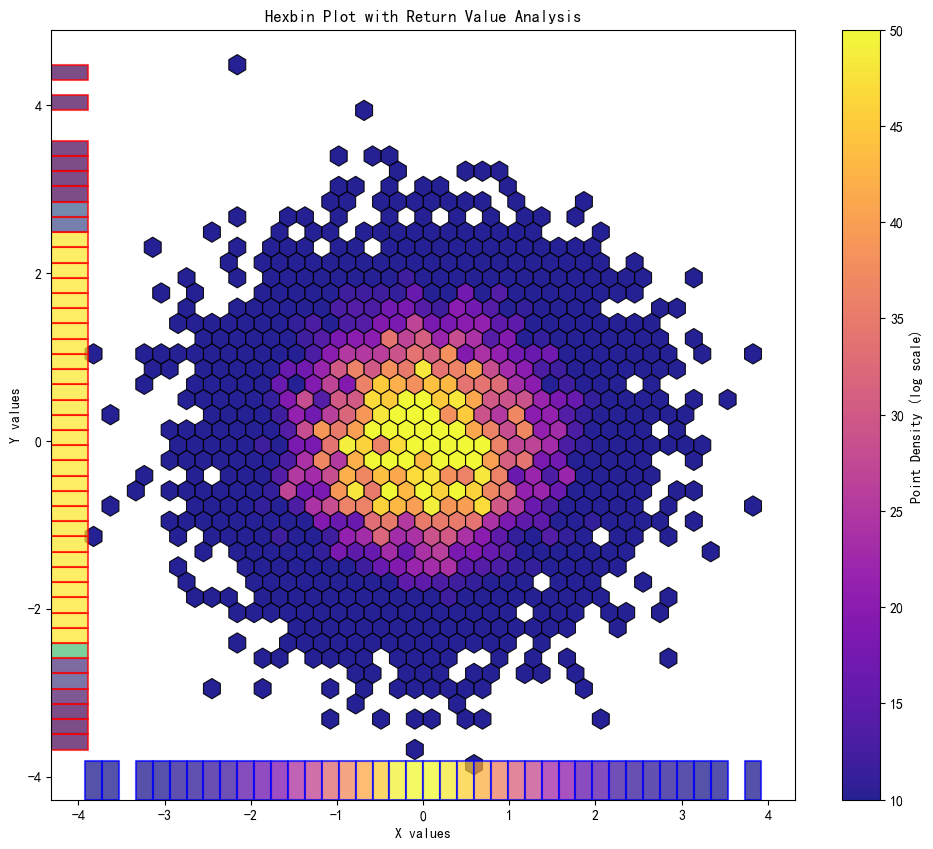

In [5]:
# 生成测试数据
np.random.seed(42)
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots(figsize=(12, 10))

# 绘制hexbin图并获取返回值
hb = ax.hexbin(
    x, y,
    gridsize=40,
    reduce_C_function=np.sum,
    cmap='viridis',
    mincnt=1,
    edgecolors='none',
    linewidths=0.5,
    marginals=True  # 启用边际图
)

# -----------------------------------------
# 通过返回值属性获取六边形分箱图的核心数据
# -----------------------------------------
# 1. 访问六边形中心坐标
hex_centers = hb.get_offsets()
print(f"六边形中心坐标数组形状: {hex_centers.shape}")  # (M, 2)

# 2. 访问六边形值
hex_values = hb.get_array()
print(f"六边形值数组形状: {hex_values.shape}")  # (M,)

# 3. 访问边际图对象
if hasattr(hb, 'hbar') and hasattr(hb, 'vbar'):
    # 修改x方向边际图样式
    hb.hbar.set_color('blue')
    hb.hbar.set_linewidth(1.5)
    hb.hbar.set_alpha(0.7)
    hbar_values = hb.hbar.get_array()
    print(f"x方向边际图值数组形状: {hbar_values.shape}")
    
    # 修改y方向边际图样式
    hb.vbar.set_color('red')
    hb.vbar.set_linewidth(1.5)
    hb.vbar.set_alpha(0.7)
    vbar_values = hb.vbar.get_array()
    print(f"x方向边际图值数组形状: {vbar_values.shape}") 

# --------------------------
# 通过返回值修改样式
# --------------------------
hb.set_edgecolor('black')  # 修改边缘颜色
hb.set_linewidth(0.8)      # 修改边缘线宽
hb.set_alpha(0.9)         # 设置透明度
hb.set_cmap('plasma')     # 修改颜色映射
hb.set_clim(vmin=10, vmax=50) # 修改数据范围（通过颜色条阈值控制）



cb = fig.colorbar(hb, ax=ax)
cb.set_label('Point Density (log scale)')
ax.set_title("Hexbin Plot with Return Value Analysis")
ax.set_xlabel("X values")
ax.set_ylabel("Y values")

plt.show()